# Image classification with Deep Learning

This notebook implements the computer lab work on deep learning, part of the course Statistical Machine Learning, 1RT700, at Uppsala University. The lab instructions can be found [here](https://github.com/nikwa/deep-learning-course/blob/master/lab-instructions/DLlab_labpm_python.pdf).

## Basics of TensorFlow
We start by running some basic TensorFlow commands to get acquainted with the library (corresponding to Section 2 of the instructions).

In [11]:
# Load the tensorflow package
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

# Create a constant representing x=2
x = tf.constant(value=2)

# Create a constant representing y=1
y = tf.constant(value=1)

# Add the two numbers
z = x+y

To carry out the computation we need to launch the graph in a session.

In [12]:
# Create session
sess = tf.Session()

# Compute
result = sess.run(z)
print(result)

3


In [13]:
# Evalute a list of nodes
result = sess.run([x,y,z])
print(result)

[2, 1, 3]


When we are done, the session should be closed to free up resources.

In [14]:
sess.close()

To construct functions we make use of placeholders.

In [15]:
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
z = x+y

# Create a session and feed the desired input to the graph
sess = tf.Session()
result = sess.run(z,feed_dict={x:2, y:1})
print(result)
sess.close()

3.0


Variables can be updated to change their values during execution.

In [16]:
x = tf.Variable(initial_value=0.0)
y = tf.constant(value=1.0)
new_value = x+y
update = tf.assign(x,new_value)

# We first have to add this initialization operation to the graph
init_op = tf.global_variables_initializer()

# Create session and run the graph operations in a for loop
sess = tf.Session()
sess.run(init_op)
print(sess.run(x))
for i in range(0,3):
    sess.run(update)
    print(sess.run(x))

sess.close()

0.0
1.0
2.0
3.0


## Linear regression example
Next we consider a simple linear regression example using TensorFlow. We consider the model
$$Y = \beta_0 + X\beta_1 + \epsilon$$
where $\epsilon$ represents the noise term.

We start by generating some synthetic data.

In [17]:
import numpy as np
# Generate data
n = 100
xt = np.random.uniform(low=0,high=1,size=n)
beta_true = [0.3, 0.1]
yt = beta_true[0] + beta_true[1]*xt + 0.01*np.random.randn(n)

Plot the data to se what it looks like.

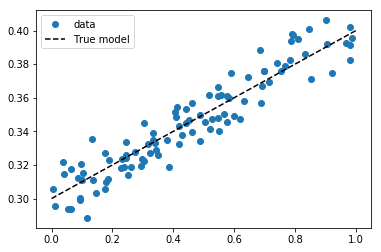

In [18]:
import matplotlib.pyplot as plt
plt.plot(xt,yt,'o',label='data')
plt.plot([0,1],[beta_true[0],beta_true[0]+beta_true[1]*1],'k--',label='True model')
plt.legend()
plt.show()

We are now ready to fit a model using TensorFlow.

In [19]:
# Create placeholders for data and parameters
X = tf.placeholder(dtype=tf.float32, shape=(None,2))
Y = tf.placeholder(dtype=tf.float32, shape=(None,1))
beta = tf.Variable(initial_value = tf.constant(value=1.0, shape=(2,1)), dtype=tf.float32)

# Construct loss function (MSE)
Z = tf.matmul(X, beta)
#mse = tf.losses.mean_squared_error(Y,Z)
#mean_squared_error = tf.reduce_mean((Z-Y)^2)
mse = tf.reduce_mean(tf.square(Y-Z))
cost_history = np.empty(shape=[1],dtype=float)

# Optimize with gradient descent
gamma = 0.1 # Learning rate (step size)
train_step = tf.train.GradientDescentOptimizer(gamma).minimize(mse)

# Start session
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Build data matrix
Xt = np.column_stack((np.ones(n),xt))
Yt = np.reshape(yt,[n,1])

# Update parameters in a loop
for i in range(1000):
    sess.run(train_step, feed_dict={X:Xt,Y:Yt})
    
# Predict the output before closing the session
betahat = sess.run(beta)
Zout = sess.run(Z,feed_dict={X:Xt})
sess.close()

Plot the results

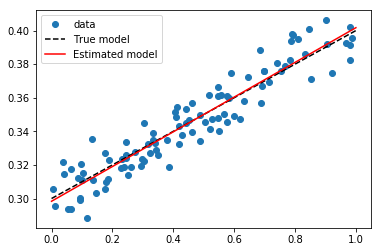

In [20]:
plt.plot(xt,yt,'o',label='data')
plt.plot([0,1],[beta_true[0],beta_true[0]+beta_true[1]*1],'k--',label='True model')
plt.plot([0,1],[betahat[0],betahat[0]+betahat[1]*1],'r-',label='Estimated model')
plt.legend()
plt.show()